In [1]:
#Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#  Defining a function that creates a bracelet with given roots of any length
def Bracelet(a,b,n):
    brac = np.zeros(n)
    brac[0] = a
    brac[1] = b
    for i in range(n-2):
        ph = brac[i] + brac[i+1]
        brac[2+i] = ph % 10
    return brac

In [3]:
#Testing the Bracelet Builder for the given example.
B15 = Bracelet(1,5,100)
print(B15)

[1. 5. 6. 1. 7. 8. 5. 3. 8. 1. 9. 0. 9. 9. 8. 7. 5. 2. 7. 9. 6. 5. 1. 6.
 7. 3. 0. 3. 3. 6. 9. 5. 4. 9. 3. 2. 5. 7. 2. 9. 1. 0. 1. 1. 2. 3. 5. 8.
 3. 1. 4. 5. 9. 4. 3. 7. 0. 7. 7. 4. 1. 5. 6. 1. 7. 8. 5. 3. 8. 1. 9. 0.
 9. 9. 8. 7. 5. 2. 7. 9. 6. 5. 1. 6. 7. 3. 0. 3. 3. 6. 9. 5. 4. 9. 3. 2.
 5. 7. 2. 9.]


In [4]:
#Building a function that finds the termination point for a given bracelet
#Simplified given the fact that there can be at most 100 beads in a given bracelet because we have at most 100 pairs of roots
def finderk(a,b):
    arr = Bracelet(a,b, 100)
    for i in range(2, len(arr)):
        if arr[i] == b and arr[i - 1] == a:
            return i - 1  # Return the position of the first occurrence

    # If no match is found, indicating some error in one of the previous functions
    return None

In [5]:
k = finderk(1,5)
print(k)
print(Bracelet(1,5,k))

60
[1. 5. 6. 1. 7. 8. 5. 3. 8. 1. 9. 0. 9. 9. 8. 7. 5. 2. 7. 9. 6. 5. 1. 6.
 7. 3. 0. 3. 3. 6. 9. 5. 4. 9. 3. 2. 5. 7. 2. 9. 1. 0. 1. 1. 2. 3. 5. 8.
 3. 1. 4. 5. 9. 4. 3. 7. 0. 7. 7. 4.]


In [6]:
#Defining a function that can easily print the Latex compatible version of Bracelet B_a,b
def Printer(a,b):

    float_array = Bracelet(a,b,finderk(a,b)+2)
    int_array = [int(num) for num in float_array]

    result_string = " \\rightarrow ".join(map(str, int_array))
    print(result_string)

In [7]:
#Defining a function that checks if a given pair of numbers is a sub-root of a given bracelet.
def finder(a, b, arr):
    for i in range(1, len(arr)):
        if arr[i] == b and arr[i - 1] == a:
            print(a, b, "is a subroot")
            return

    # If no match is found, print "not a subroot"
    print(a, b, "not a subroot.")

In [8]:
#Finding all the subroots and nonsubroots of B15
for i in range(10):
    for j in range(10):
        finder(i,j, B15)

0 0 not a subroot.
0 1 is a subroot
0 2 not a subroot.
0 3 is a subroot
0 4 not a subroot.
0 5 not a subroot.
0 6 not a subroot.
0 7 is a subroot
0 8 not a subroot.
0 9 is a subroot
1 0 is a subroot
1 1 is a subroot
1 2 is a subroot
1 3 not a subroot.
1 4 is a subroot
1 5 is a subroot
1 6 is a subroot
1 7 is a subroot
1 8 not a subroot.
1 9 is a subroot
2 0 not a subroot.
2 1 not a subroot.
2 2 not a subroot.
2 3 is a subroot
2 4 not a subroot.
2 5 is a subroot
2 6 not a subroot.
2 7 is a subroot
2 8 not a subroot.
2 9 is a subroot
3 0 is a subroot
3 1 is a subroot
3 2 is a subroot
3 3 is a subroot
3 4 not a subroot.
3 5 is a subroot
3 6 is a subroot
3 7 is a subroot
3 8 is a subroot
3 9 not a subroot.
4 0 not a subroot.
4 1 is a subroot
4 2 not a subroot.
4 3 is a subroot
4 4 not a subroot.
4 5 is a subroot
4 6 not a subroot.
4 7 not a subroot.
4 8 not a subroot.
4 9 is a subroot
5 0 not a subroot.
5 1 is a subroot
5 2 is a subroot
5 3 is a subroot
5 4 is a subroot
5 5 not a subroot.


In [9]:
#Defining a moddified version of the finder function that will help with printing an array of all the pairs instead of piecewise outputs. Helps in printing in Latex document
def finderT(a, b, arr):
    for i in range(1, len(arr)):
        if arr[i] == b and arr[i - 1] == a:
            return True  # Return True if it's a subroot

    # If no match is found, return False
    return False

In [10]:
#Getting a list of all the roots and nonroots of B15 in a printable format:
subrootsB15 = []
non_subrootsB15 = []

for i in range(10):
    for j in range(10):
        if finderT(i, j, B15):
            subrootsB15.append((i, j))
        else:
            non_subrootsB15.append((i, j))

print("Subroots:")
print(subrootsB15)
print("\nNon-subroots:")
print(non_subrootsB15)

Subroots:
[(0, 1), (0, 3), (0, 7), (0, 9), (1, 0), (1, 1), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (2, 3), (2, 5), (2, 7), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 3), (4, 5), (4, 9), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (6, 1), (6, 5), (6, 7), (6, 9), (7, 0), (7, 2), (7, 3), (7, 4), (7, 5), (7, 7), (7, 8), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (9, 0), (9, 1), (9, 3), (9, 4), (9, 5), (9, 6), (9, 8), (9, 9)]

Non-subroots:
[(0, 0), (0, 2), (0, 4), (0, 5), (0, 6), (0, 8), (1, 3), (1, 8), (2, 0), (2, 1), (2, 2), (2, 4), (2, 6), (2, 8), (3, 4), (3, 9), (4, 0), (4, 2), (4, 4), (4, 6), (4, 7), (4, 8), (5, 0), (5, 5), (6, 0), (6, 2), (6, 3), (6, 4), (6, 6), (6, 8), (7, 1), (7, 6), (8, 0), (8, 2), (8, 4), (8, 6), (8, 8), (8, 9), (9, 2), (9, 7)]


In [11]:
#Initial Analysis of B02
print(Bracelet(0,2,30))

[0. 2. 2. 4. 6. 0. 6. 6. 2. 8. 0. 8. 8. 6. 4. 0. 4. 4. 8. 2. 0. 2. 2. 4.
 6. 0. 6. 6. 2. 8.]


In [12]:
#Finding the terminating point of B02
finderk(0,2)

20

In [13]:
#Printing B02 till the repitition point
B02 = Bracelet(0,2,finderk(0,2)+2)
print(Bracelet(0,2,finderk(0,2)+2))

[0. 2. 2. 4. 6. 0. 6. 6. 2. 8. 0. 8. 8. 6. 4. 0. 4. 4. 8. 2. 0. 2.]


In [14]:
#Analysing the subroots of B02
for i in range(10):
    for j in range(10):
        finder(i,j, B02)

0 0 not a subroot.
0 1 not a subroot.
0 2 is a subroot
0 3 not a subroot.
0 4 is a subroot
0 5 not a subroot.
0 6 is a subroot
0 7 not a subroot.
0 8 is a subroot
0 9 not a subroot.
1 0 not a subroot.
1 1 not a subroot.
1 2 not a subroot.
1 3 not a subroot.
1 4 not a subroot.
1 5 not a subroot.
1 6 not a subroot.
1 7 not a subroot.
1 8 not a subroot.
1 9 not a subroot.
2 0 is a subroot
2 1 not a subroot.
2 2 is a subroot
2 3 not a subroot.
2 4 is a subroot
2 5 not a subroot.
2 6 not a subroot.
2 7 not a subroot.
2 8 is a subroot
2 9 not a subroot.
3 0 not a subroot.
3 1 not a subroot.
3 2 not a subroot.
3 3 not a subroot.
3 4 not a subroot.
3 5 not a subroot.
3 6 not a subroot.
3 7 not a subroot.
3 8 not a subroot.
3 9 not a subroot.
4 0 is a subroot
4 1 not a subroot.
4 2 not a subroot.
4 3 not a subroot.
4 4 is a subroot
4 5 not a subroot.
4 6 is a subroot
4 7 not a subroot.
4 8 is a subroot
4 9 not a subroot.
5 0 not a subroot.
5 1 not a subroot.
5 2 not a subroot.
5 3 not a subroot

In [15]:
#Finding the terminating point of B13
finderk(1,3)

12

In [16]:
#Printing B13 till the terminating point
B13 = Bracelet(1,3,finderk(1,3)+2)
print(B13)

[1. 3. 4. 7. 1. 8. 9. 7. 6. 3. 9. 2. 1. 3.]


In [17]:
#Printing B13 in a Latex format
Printer(1,3)

1 \rightarrow 3 \rightarrow 4 \rightarrow 7 \rightarrow 1 \rightarrow 8 \rightarrow 9 \rightarrow 7 \rightarrow 6 \rightarrow 3 \rightarrow 9 \rightarrow 2 \rightarrow 1 \rightarrow 3


In [18]:
#Printing the subroots and nonsubroots of B02
subrootsB02 = []
non_subrootsB02 = []

for i in range(10):
    for j in range(10):
        if finderT(i, j, Bracelet(0,2,30)):
            subrootsB02.append((i, j))
        else:
            non_subrootsB02.append((i, j))

print("Subroots:")
print(subrootsB02)
print("\nNon-subroots:")
print(non_subrootsB02)

Subroots:
[(0, 2), (0, 4), (0, 6), (0, 8), (2, 0), (2, 2), (2, 4), (2, 8), (4, 0), (4, 4), (4, 6), (4, 8), (6, 0), (6, 2), (6, 4), (6, 6), (8, 0), (8, 2), (8, 6), (8, 8)]

Non-subroots:
[(0, 0), (0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 1), (2, 3), (2, 5), (2, 6), (2, 7), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 1), (4, 2), (4, 3), (4, 5), (4, 7), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 1), (8, 3), (8, 4), (8, 5), (8, 7), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [19]:
#Printing a Latex compatible version of B02
my_float_array = Bracelet(0,2,finderk(0,2)+2)

my_array = [int(num) for num in my_float_array]

result_string = " \\rightarrow ".join(map(str, my_array))

print(result_string)

0 \rightarrow 2 \rightarrow 2 \rightarrow 4 \rightarrow 6 \rightarrow 0 \rightarrow 6 \rightarrow 6 \rightarrow 2 \rightarrow 8 \rightarrow 0 \rightarrow 8 \rightarrow 8 \rightarrow 6 \rightarrow 4 \rightarrow 0 \rightarrow 4 \rightarrow 4 \rightarrow 8 \rightarrow 2 \rightarrow 0 \rightarrow 2


In [20]:
#Printing only the non-subroots of B15 with both roots either even or a pair of 0 and an even number
even_non_subroot_B15 = [(x, y) for x, y in non_subrootsB15 if (x % 2 == 0 and y % 2 == 0)]

print(even_non_subroot_B15)

[(0, 0), (0, 2), (0, 4), (0, 6), (0, 8), (2, 0), (2, 2), (2, 4), (2, 6), (2, 8), (4, 0), (4, 2), (4, 4), (4, 6), (4, 8), (6, 0), (6, 2), (6, 4), (6, 6), (6, 8), (8, 0), (8, 2), (8, 4), (8, 6), (8, 8)]


In [21]:
#Defining a function that filters elements of array1 if they are not in array2
def elements_not_in_array2(array1, array2):
    return [elem for elem in array1 if elem not in array2]


In [22]:
#Filtering out the even subroots of B15 such that they are not subroots of B02
non_even_subroots_B02 = elements_not_in_array2(even_non_subroot_B15, subrootsB02)
print(non_even_subroots_B02)

[(0, 0), (2, 6), (4, 2), (6, 8), (8, 4)]


In [23]:
#Finding subroots of B02 that are not subroots of B15
subrootsB02_proper = elements_not_in_array2(even_non_subroot_B15, non_even_subroots_B02)
print(subrootsB02_proper)

[(0, 2), (0, 4), (0, 6), (0, 8), (2, 0), (2, 2), (2, 4), (2, 8), (4, 0), (4, 4), (4, 6), (4, 8), (6, 0), (6, 2), (6, 4), (6, 6), (8, 0), (8, 2), (8, 6), (8, 8)]


In [24]:
#Printing a Latex compatible version of B26
Printer(2,6)

2 \rightarrow 6 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 6


In [25]:
#Creating a function that plots all the graphs
def create_gradient_segment(x1, y1, x2, y2, cmap, norm):
    # Create a custom colormap for the segment
    segment_cmap = LinearSegmentedColormap.from_list('seg', [cmap(norm(y1)), cmap(norm(y2))])
    seg = np.array([[x1, x2], [y1, y2]]).T
    lc = LineCollection([seg], cmap=segment_cmap, norm=norm, linestyle=':')
    lc.set_array([y1, y2])
    return lc
#Graphs the bracelet with given roots a and b.
def Grapher(a, b):
    n = finderk(a, b) + 2
    x_p = np.arange(0, n)
    y_p = Bracelet(a, b, n)

    plt.figure(figsize=(10, 6))

    # Setup colormap and normalization
    cmap = plt.cm.Spectral
    norm = plt.Normalize(min(y_p), max(y_p))

    # Creating each line segment with colour that changes as the bracelet progresses
    for i in range(n - 1):
        lc = create_gradient_segment(x_p[i], y_p[i], x_p[i+1], y_p[i+1], cmap, norm)
        lc.set_linewidth(1.5)
        plt.gca().add_collection(lc)

    # Scatter plot colouring the plots based on the vertical height
    scatter = plt.scatter(x_p, y_p, c=y_p, cmap=cmap, marker='o', edgecolors='black', s=50, label=r'$B_{{{},{}}}$'.format(a, b))

    # Making the plot look nice.
    plt.title('Your Data Plot with Gradient Dotted Lines and Vibrant Points', fontsize=16)
    plt.xlabel('X-axis Label', fontsize=14)
    plt.ylabel('Y-axis Label', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Values')  # Add a colorbar using the scatter object
    plt.legend()

    # Set integer tick marks on the x-axis
    plt.xticks(np.arange(0, n, 2 if (a, b) != (1, 5) else 4))

    plt.show()

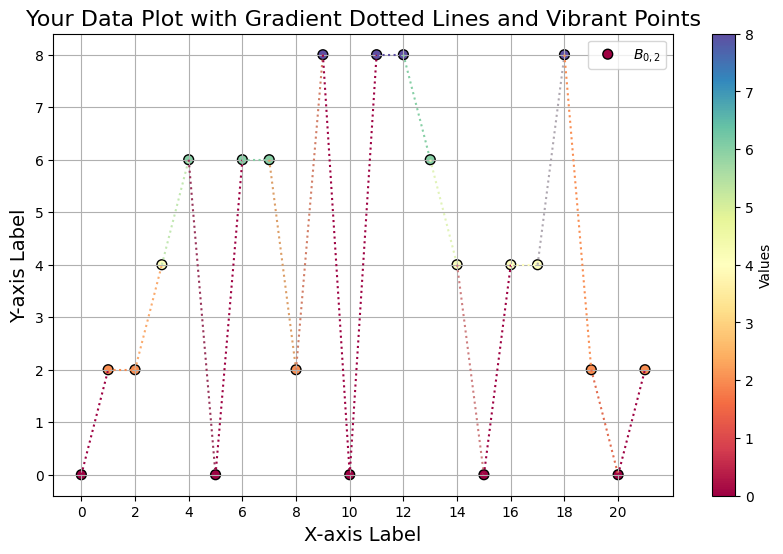

In [26]:
Grapher(0,2)

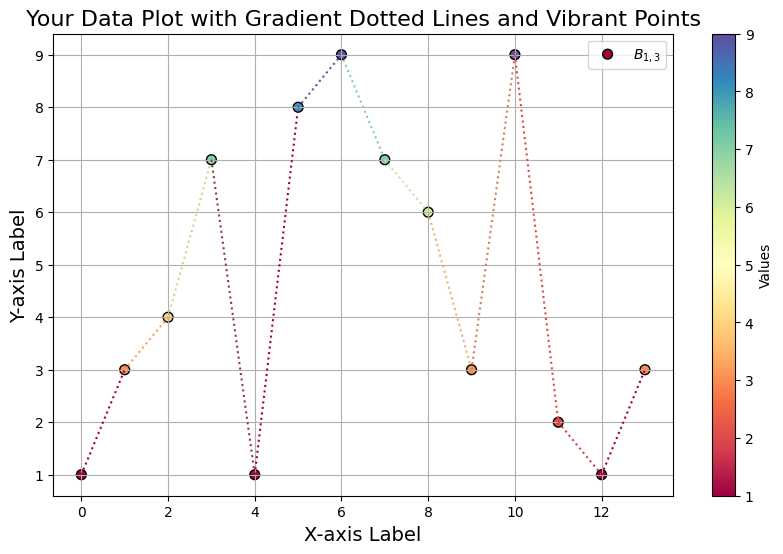

In [27]:
Grapher(1,3)

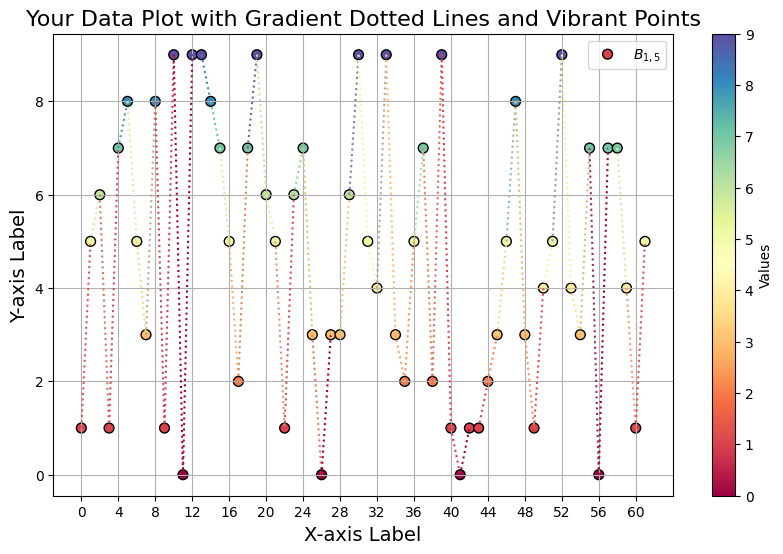

In [28]:
Grapher(1,5)

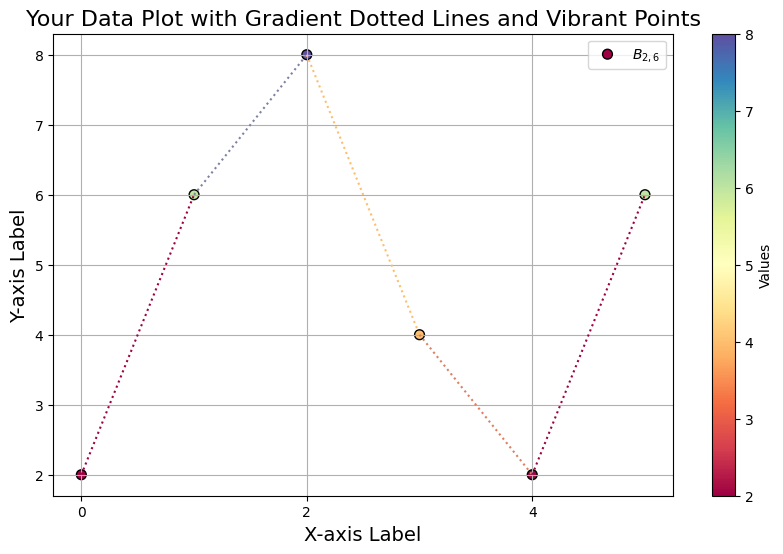

In [29]:
Grapher(2,6)

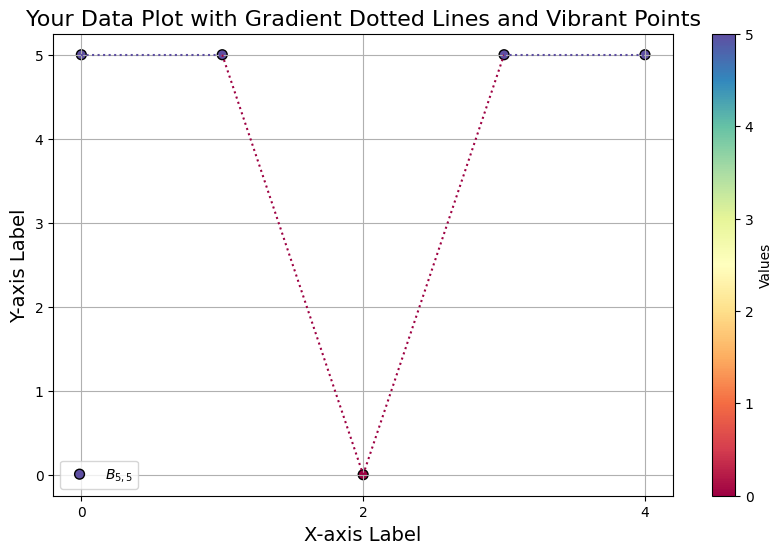

In [30]:
Grapher(5,5)